In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv('../Data/wine-clustering.csv')

In [84]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [85]:
df.shape

(178, 13)

In [86]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


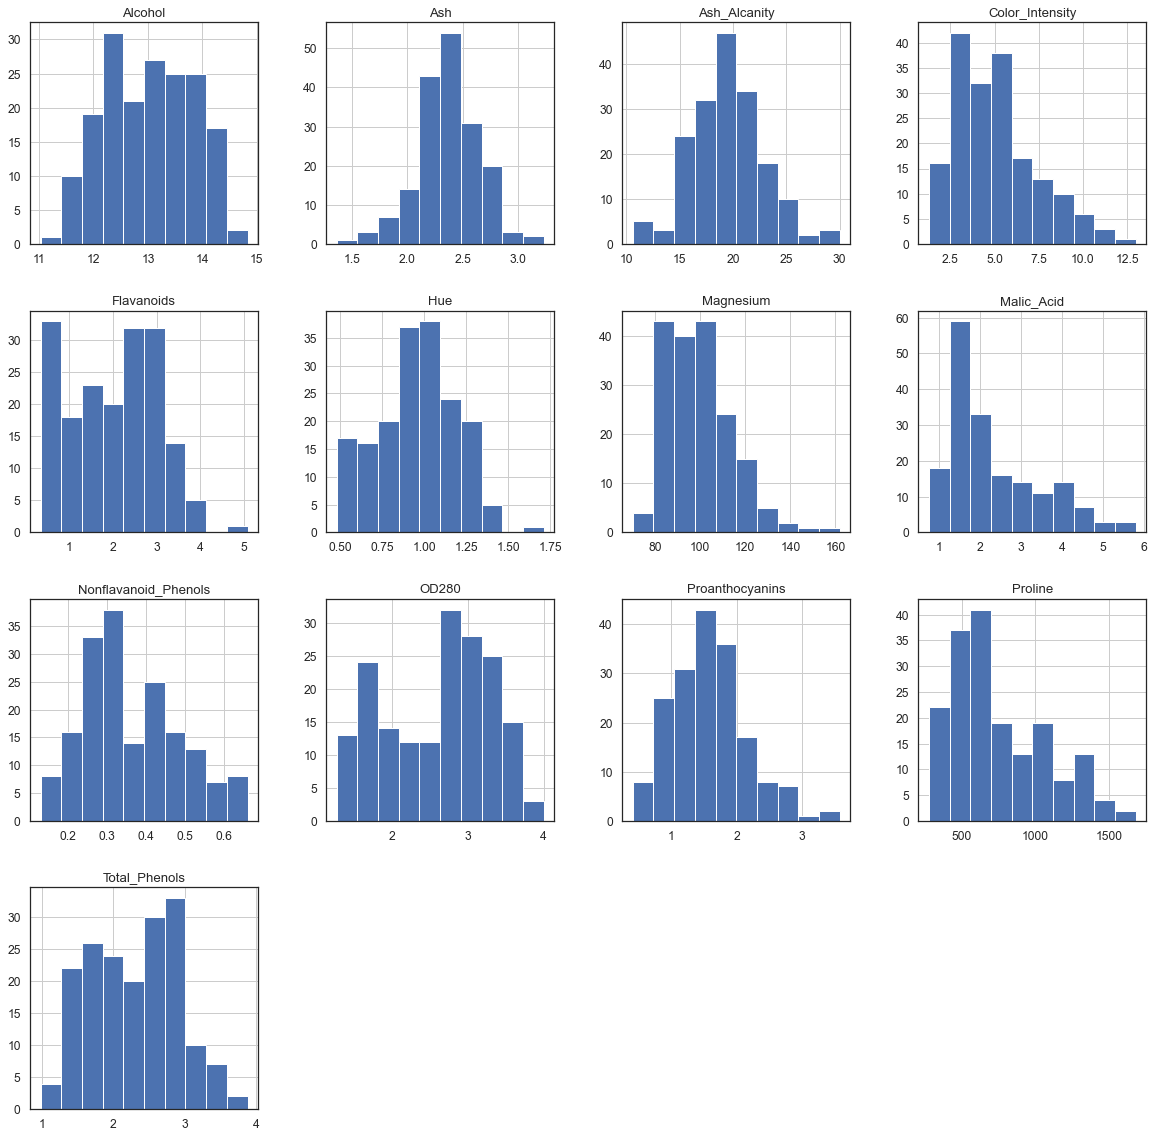

In [88]:
df.hist(figsize=(20,20))
plt.show()

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
df_scaler = scaler.transform(df)
df_scaler = pd.DataFrame(df_scaler, columns=df.columns)
df_scaler.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


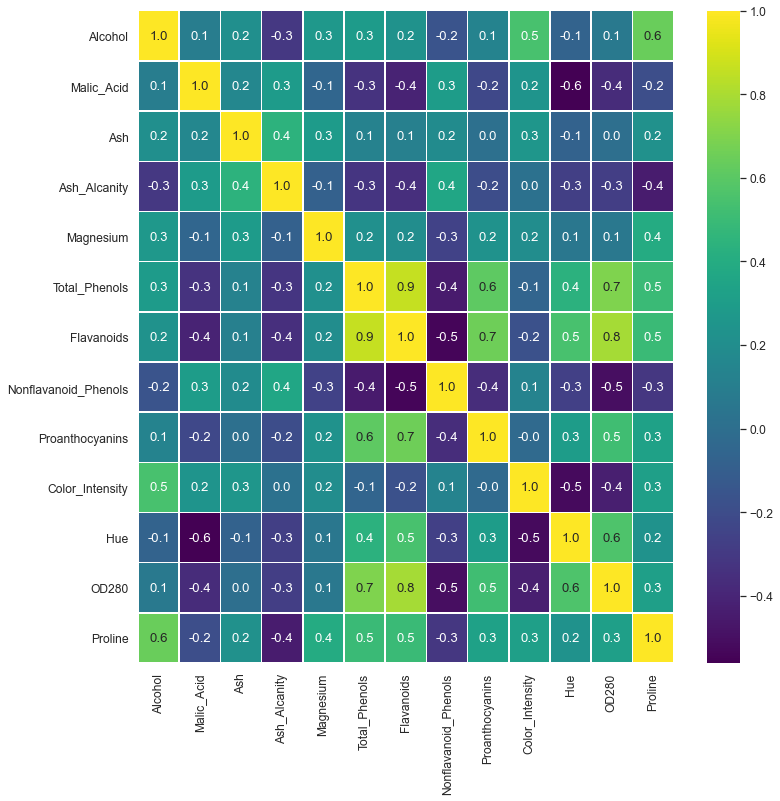

In [90]:
corr = df_scaler.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, fmt=".1f", annot=True, linewidths=.5, cmap='viridis')

In [91]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaler)
print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 55.41%


In [92]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

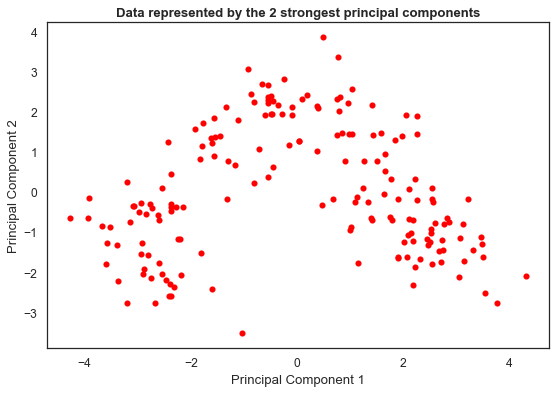

In [93]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_result[:, 0], y=pca_result[:, 1], color='red',lw=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data represented by the 2 strongest principal components',fontweight='bold')
plt.show()

In [94]:
from sklearn.cluster import KMeans
from sklearn import metrics

inertia = []
sill = []
chs = []
dbs = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaler)
    inertia.append(kmeans.inertia_)
    sill.append(metrics.silhouette_score(df_scaler, labels=kmeans.labels_))
    chs.append(metrics.calinski_harabasz_score(X=df_scaler, labels=kmeans.labels_))
    dbs.append(metrics.davies_bouldin_score(X=df_scaler, labels=kmeans.labels_))

In [95]:
data = {"Numero de Cluster": range(2,11),
        "Inertia" : inertia,
       "Silhouette" : sill,
       "Calinsk Harabasz": chs,
       "Davies Bouldin": dbs}

In [96]:
comparacao = pd.DataFrame(data).set_index('Numero de Cluster')
comparacao

,Inertia,Silhouette,Calinsk Harabasz,Davies Bouldin
Numero de Cluster,,,,
2,1659.007967,0.268313,69.486464,1.448236
3,1277.928489,0.284859,70.940008,1.389188
4,1184.017641,0.248003,55.353041,1.733183
5,1109.292578,0.201140,46.970111,1.801057
6,1048.033459,0.223981,41.553300,1.673475
7,978.162349,0.207233,38.921323,1.630982
8,943.670401,0.141481,35.265950,1.881002
9,899.146339,0.137876,33.241289,1.779077
10,858.721519,0.147438,31.634468,1.656327


C:\Users\ferna\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


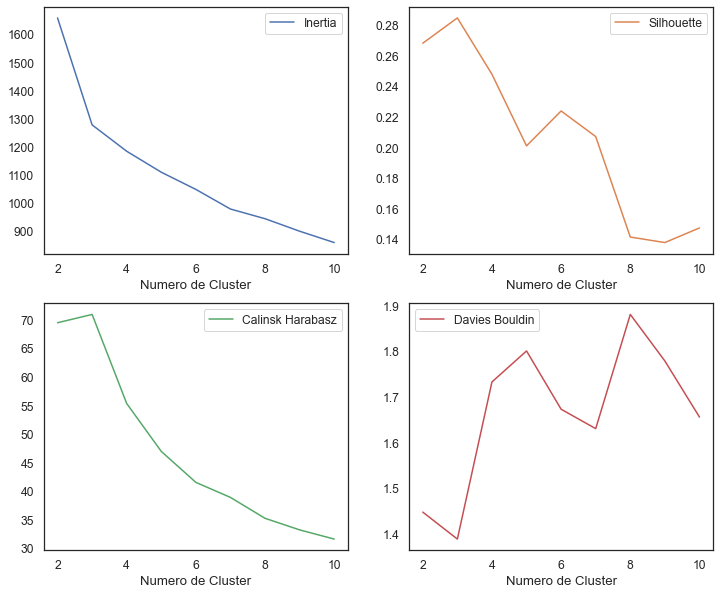

In [97]:
fig, ax = plt.subplots(figsize=(12,10))
comparacao.plot(ax= ax, layout=(2,2), subplots = True)
plt.show()

In [98]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_scaler)
y_kmeans = kmeans.fit_predict(df_scaler)
df_scaler['Cluster'] = kmeans.labels_
df_scaler.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2


In [99]:
df_scaler['Cluster'].value_counts()

0    65
2    62
1    51
Name: Cluster, dtype: int64

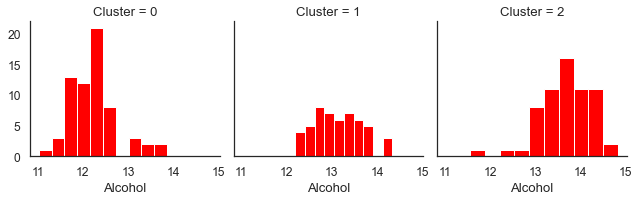

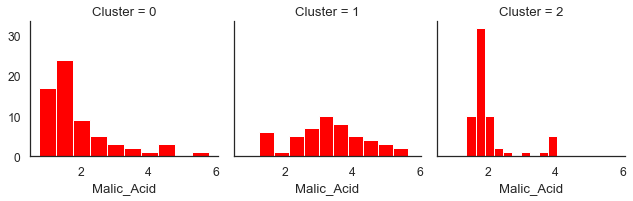

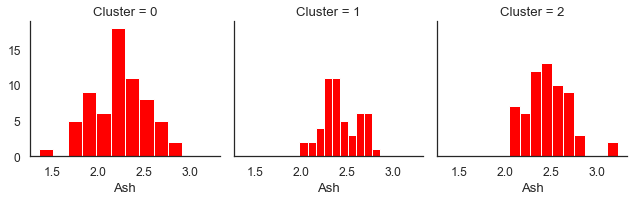

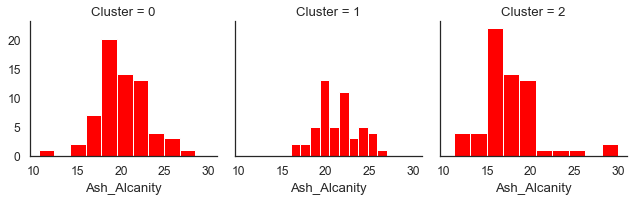

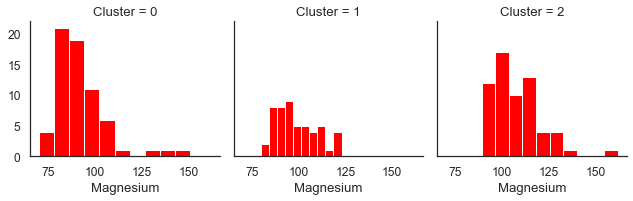

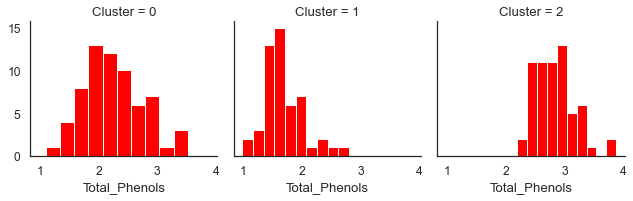

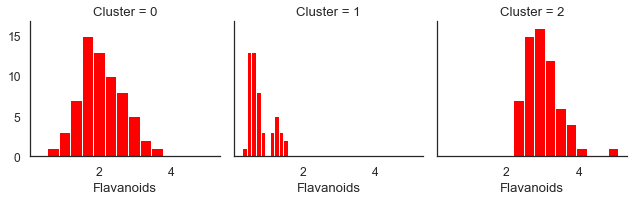

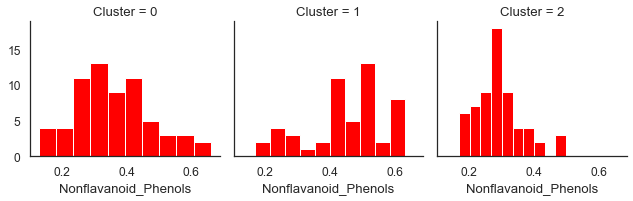

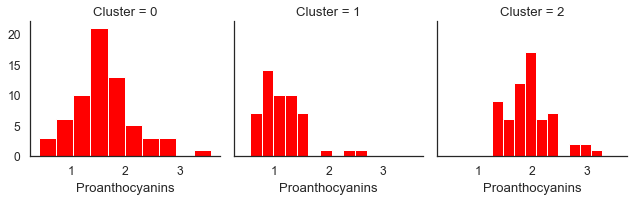

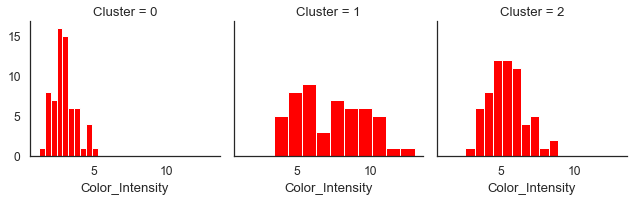

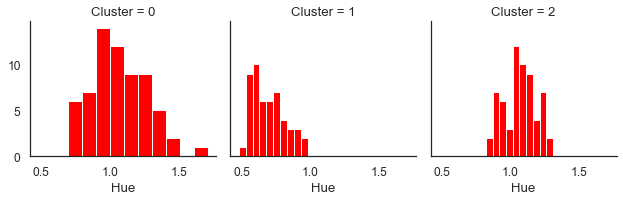

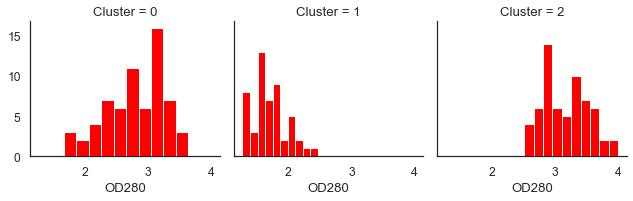

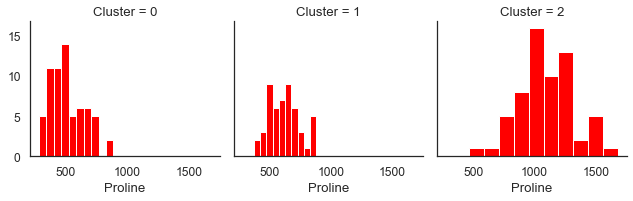

In [115]:
data2=df.copy()
data2['Cluster']=kmeans.labels_

aux=data2.columns.tolist()

for cluster in aux[0:len(aux)-1]:
    grid= sns.FacetGrid(data2, col='Cluster')
    grid.map(plt.hist, cluster,color='red')

In [109]:
data2.columns.to_list()

['Alcohol',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Magnesium',
 'Total_Phenols',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280',
 'Proline',
 'Cluster']